In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

In [3]:
df.head(5)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [5]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
columns_to_fill = ['lead_source', 'industry', 'employment_status', 'location']

# Fill NaN values in the selected object columns with the string "NA"
df[columns_to_fill] = df[columns_to_fill].fillna("NA")

In [7]:
df.annual_income = df.annual_income.fillna(0.0)

In [8]:
##Q1
#Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [9]:
#In this dataset our desired target for classification task will be "converted" variable - has the client signed up to the platform or not.

In [10]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Split into full_train (80%) and test (20%)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [12]:
# Split full_train into train (75% of full_train, which is 60% of original)
# and validation (25% of full_train, which is 20% of original)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [13]:
# Separate features (X) and target (y) for each set
X_train_full = df_full_train.drop(['converted'], axis=1)
y_train_full = df_full_train['converted']

X_train = df_train.drop('converted', axis=1)
y_train = df_train['converted']

X_val = df_val.drop('converted', axis=1)
y_val = df_val['converted']

X_test = df_test.drop('converted', axis=1)
y_test = df_test['converted']

print(f"Train set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

Train set size: 876
Validation set size: 293
Test set size: 293


In [14]:
for col in ['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']:
    auc = roc_auc_score(df_train.converted, df_train[col])
    print(f"Variable:{col} --> auc = {auc if auc >= 0.5 else roc_auc_score(df_train.converted, -df_train[col])}")

Variable:lead_score --> auc = 0.6144993577250176
Variable:number_of_courses_viewed --> auc = 0.7635680590007088
Variable:interaction_count --> auc = 0.738270176293409
Variable:annual_income --> auc = 0.5519578313253012


In [15]:
##Q2
#Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
#LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
#What's the AUC of this model on the validation dataset? (round to 3 digits)

In [16]:
train_full_dicts = X_train_full.to_dict(orient='records')
train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False).set_output(transform='pandas').fit(train_dicts)

X_train_full = dv.transform(train_full_dicts)
X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

X_train.head(5)

,annual_income,employment_status=NA,employment_status=employed,employment_status=self_employed,employment_status=student,employment_status=unemployed,industry=NA,industry=education,industry=finance,industry=healthcare,...,lead_source=social_media,location=NA,location=africa,location=asia,location=australia,location=europe,location=middle_east,location=north_america,location=south_america,number_of_courses_viewed
0,95543.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,54924.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,77352.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
3,34600.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,43615.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000).fit(X_train, y_train)
y_pred_val = lr.predict_proba(X_val)[:, 1]
round(roc_auc_score(y_val, y_pred_val), 3)

0.817

In [ ]:
##Q3
#Now let's compute precision and recall for our model.

#Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
#For each threshold, compute precision and recall
#Plot them
#At which threshold precision and recall curves intersect?

/tmp/ipykernel_6303/2629256415.py:16: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP+FP)


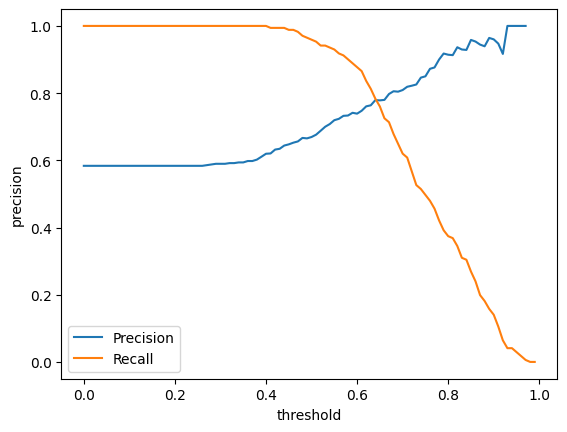

In [18]:
scores = []

for t in np.arange(0, 1, 0.01):
    predictions_true = y_pred_val >= t
    predictions_false = y_pred_val < t
    actual_true = y_val == 1
    actual_false = y_val == 0

    TN = (predictions_false & actual_false).sum()
    FP = (predictions_true & actual_false).sum()
    FN = (predictions_false & actual_true).sum()
    TP = (predictions_true & actual_true).sum()
    confusion_table = np.array([[TN, FP],
                                [FN, TP]])

    precision = TP / (TP+FP)
    recall = TP / (TP+FN)

    scores.append([t, precision, recall])

df_scores = pd.DataFrame(data=scores, columns=["threshold", "precision", "recall"])
sns.lineplot(df_scores, x="threshold", y="precision", label="Precision")
sns.lineplot(df_scores, x="threshold", y="recall", label="Recall")
plt.legend()

In [19]:
df_scores.iloc[np.argmin(np.abs(df_scores.precision - df_scores.recall))]

threshold    0.640000
precision    0.779070
recall       0.783626
Name: 64, dtype: float64

In [20]:
#Q4
##Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [21]:
df_scores["f1"] = 2*(df_scores.precision * df_scores.recall) / (df_scores.precision + df_scores.recall)
df_scores[df_scores.f1 == df_scores.f1.max()]

,threshold,precision,recall,f1
57,0.57,0.732394,0.912281,0.8125


<Axes: xlabel='threshold', ylabel='f1'>

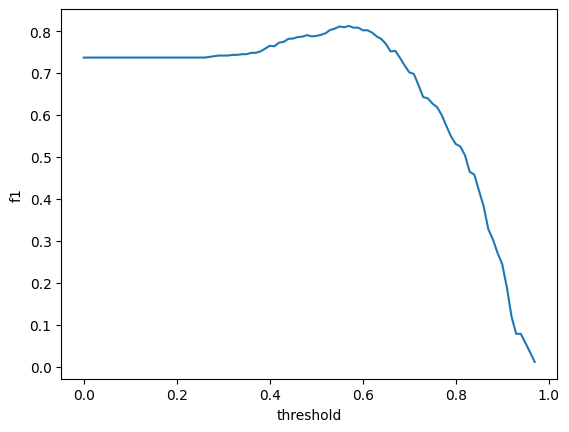

In [22]:
sns.lineplot(df_scores, x="threshold", y="f1")

In [23]:
##Q5
#5-Fold CV standard deviation 

In [24]:
#KFold(n_splits=5, shuffle=True, random_state=1)

In [25]:
def train(X, y):
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)
    return model

def predict(X, model):
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
aucs = []

for train_idx, val_idx in kfold.split(X_train_full, y_train_full):
    train_X = X_train_full.iloc[train_idx]
    val_X = X_train_full.iloc[val_idx]

    train_y = y_train_full.iloc[train_idx]
    val_y = y_train_full.iloc[val_idx]

    model = train(train_X, train_y)
    y_pred_val = predict(val_X, model)

    auc = roc_auc_score(val_y, y_pred_val)
    aucs.append(auc)

print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.822 ± 0.036


In [26]:
#Q6
#Which C leads to the best mean score?

In [27]:
def train(X, y, C):
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)
    return model

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    aucs = []

    for train_idx, val_idx in kfold.split(X_train_full, y_train_full):
        train_X = X_train_full.iloc[train_idx]
        val_X = X_train_full.iloc[val_idx]

        train_y = y_train_full.iloc[train_idx]
        val_y = y_train_full.iloc[val_idx]

        model = train(train_X, train_y, C=C)
        y_pred_val = predict(val_X, model)

        auc = roc_auc_score(val_y, y_pred_val)
        aucs.append(auc)
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=1e-06, auc = 0.560 ± 0.024
C=0.001, auc = 0.867 ± 0.029
C=1, auc = 0.822 ± 0.036
